# Data Cleaning of [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

In [1]:
import pandas as pd
import numpy as np

#loading the stroke prediction dataset
df = pd.read_csv('./dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [3]:
#checking for which row we have to find the missing values
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [4]:
#checking if there is any duplicates are found in the data sets
duplicates=df[df.duplicated()]
print(duplicates) #Empty DataFrame indicates no duplicate entries

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [5]:
#There is no use of columns since it is just a unique representation of the colum
df.drop(columns=['id'], inplace=True)

# Graphical view of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_features = df[["gender", "hypertension", "heart_disease", "ever_married", 
                       "work_type", "Residence_type", "smoking_status","stroke"]]

#### Showing the data of each feature in the percentage to understand the dataset

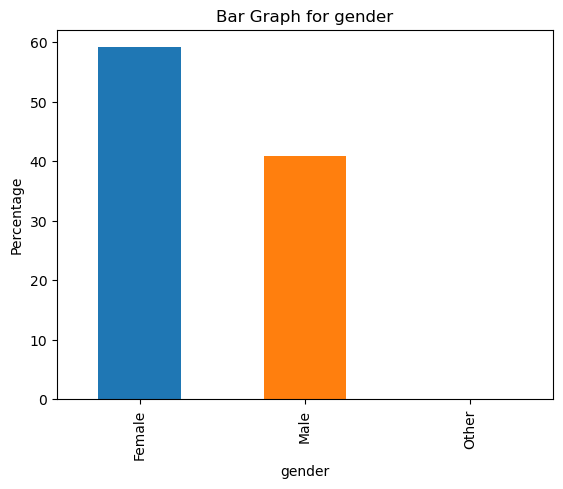

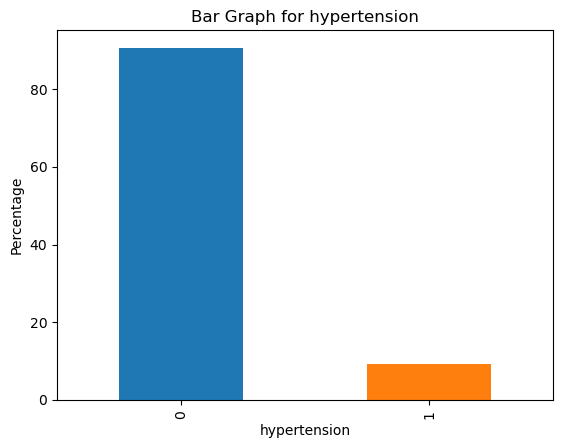

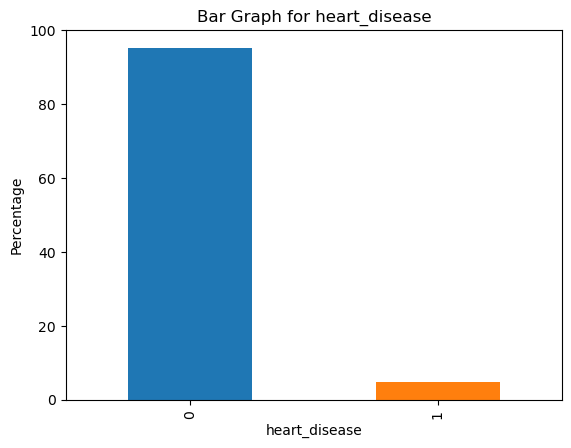

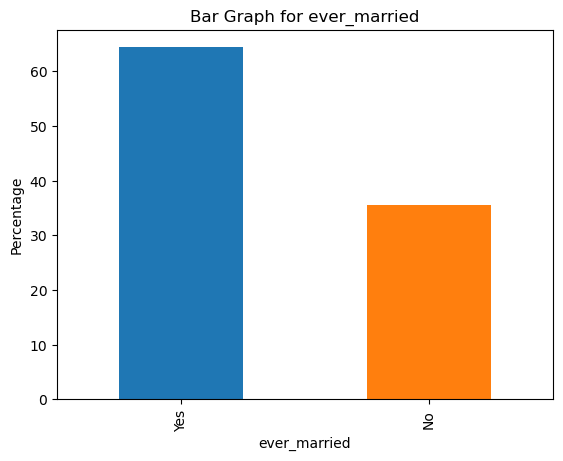

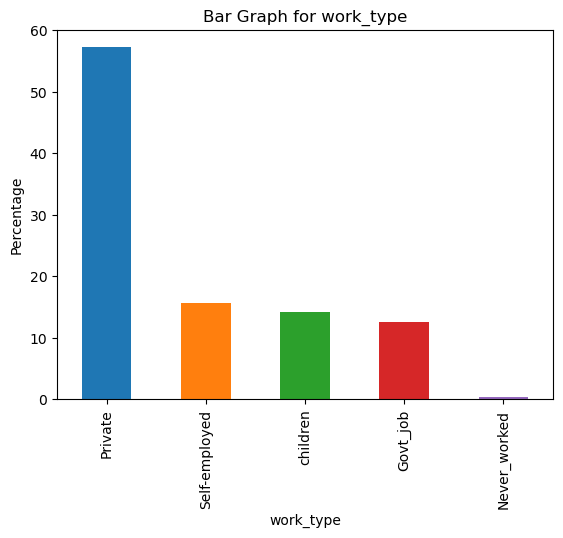

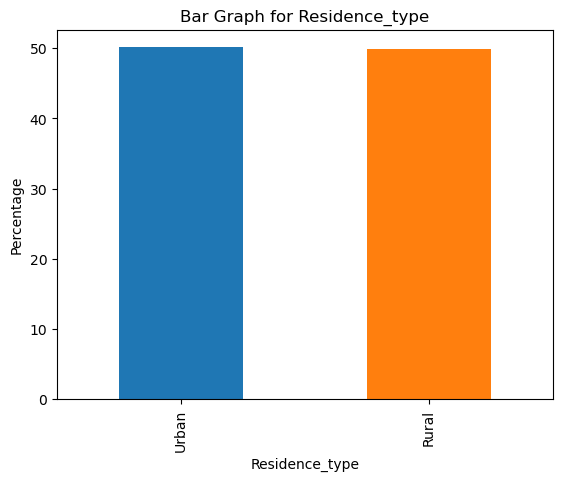

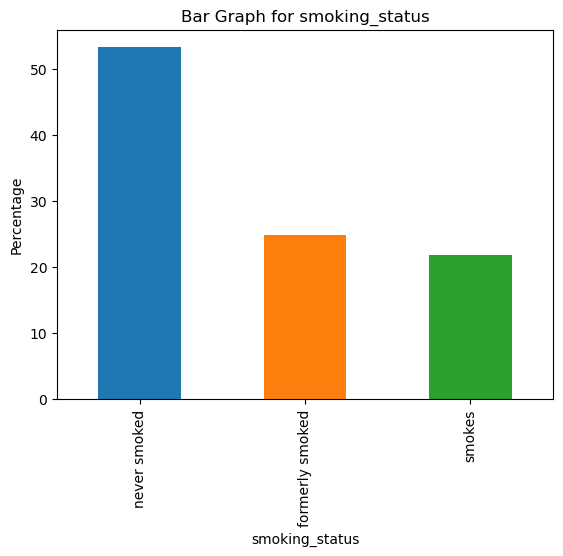

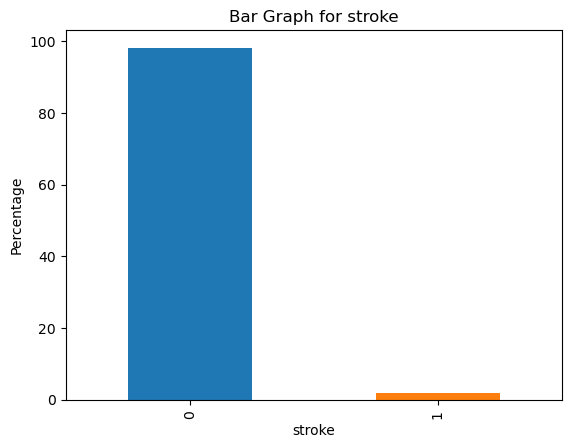

In [8]:
# Define a color palette
colors = plt.cm.tab10.colors

for i, feature in enumerate(categorical_features):
    total_count = categorical_features[feature].count()
    value_counts = categorical_features[feature].value_counts()
    percentages = (value_counts / total_count) * 100

    # Plot the bar graph with a different color for each category
    percentages.plot(kind='bar', color=[colors[i % len(colors)] for i in range(len(percentages))])
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.title(f'Bar Graph for {feature}')
    plt.show()

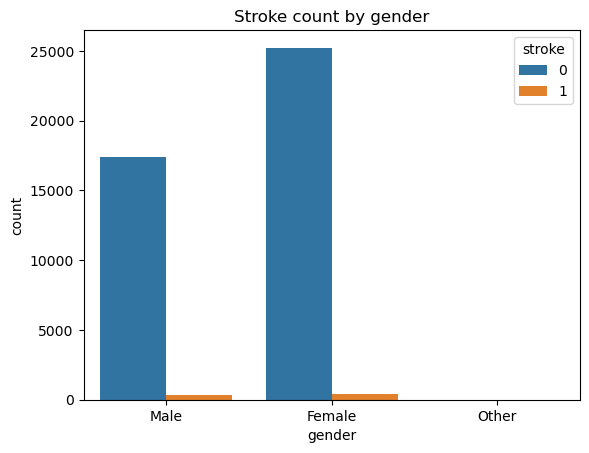

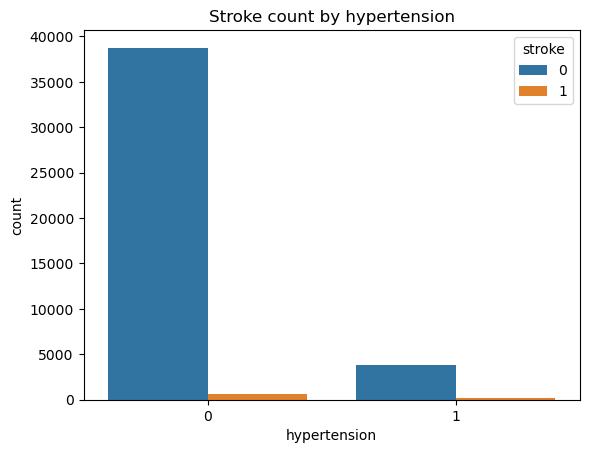

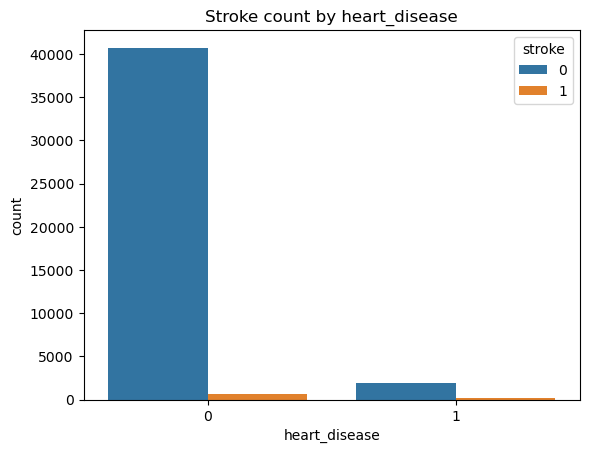

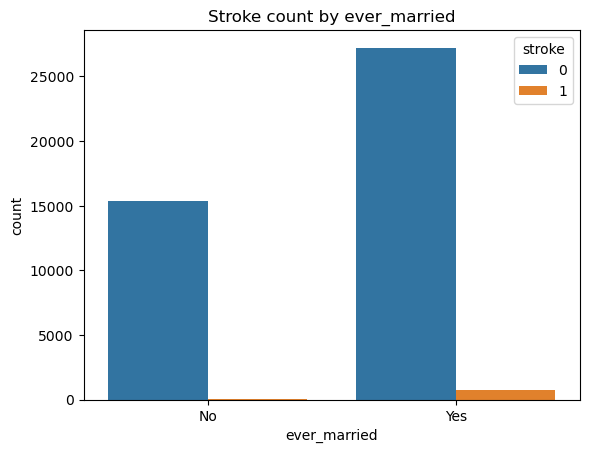

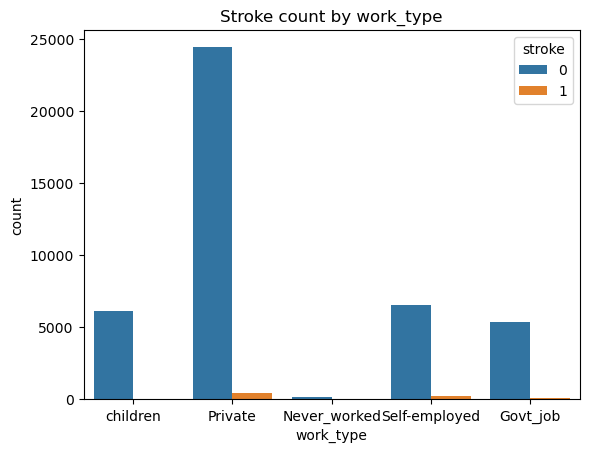

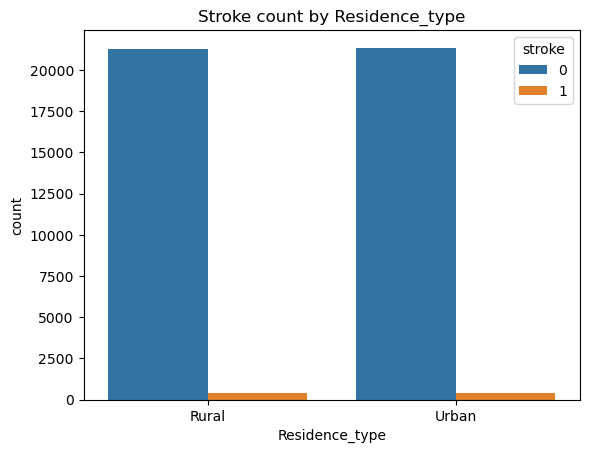

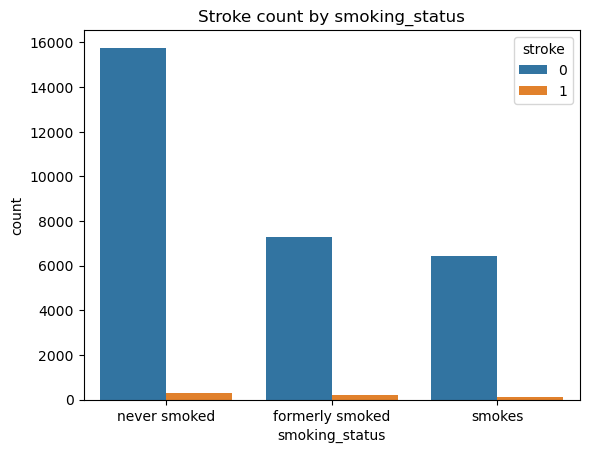

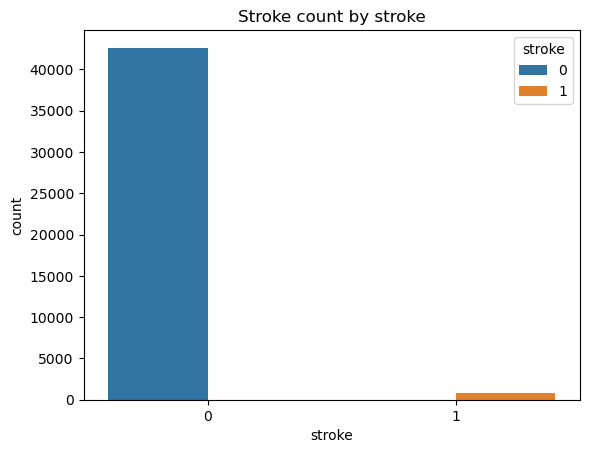

In [9]:
# Plot graphs that show the number who had stroke for categorical features.
for feature in categorical_features:
    title = "Stroke count by " + feature
    sns.countplot(data=df, x=feature, hue="stroke")
    plt.title(title)
    plt.show()

# **Handling the Null Value**

#### Checking that if there exist any dependencies in the dataset so that we can generate the missing values using ml model

In [10]:
pd=df
pd=pd.dropna()
pd.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical_features:
    pd.loc[:, feature] = label_encoder.fit_transform(pd[feature])


C:\Users\Nagathejas\AppData\Local\Temp\ipykernel_18780\1741171329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd.loc[:, feature] = label_encoder.fit_transform(pd[feature])
C:\Users\Nagathejas\AppData\Local\Temp\ipykernel_18780\1741171329.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pd.loc[:, feature] = label_encoder.fit_transform(pd[feature])
C:\Users\Nagathejas\AppData\Local\Temp\ipykernel_18780\1741171329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

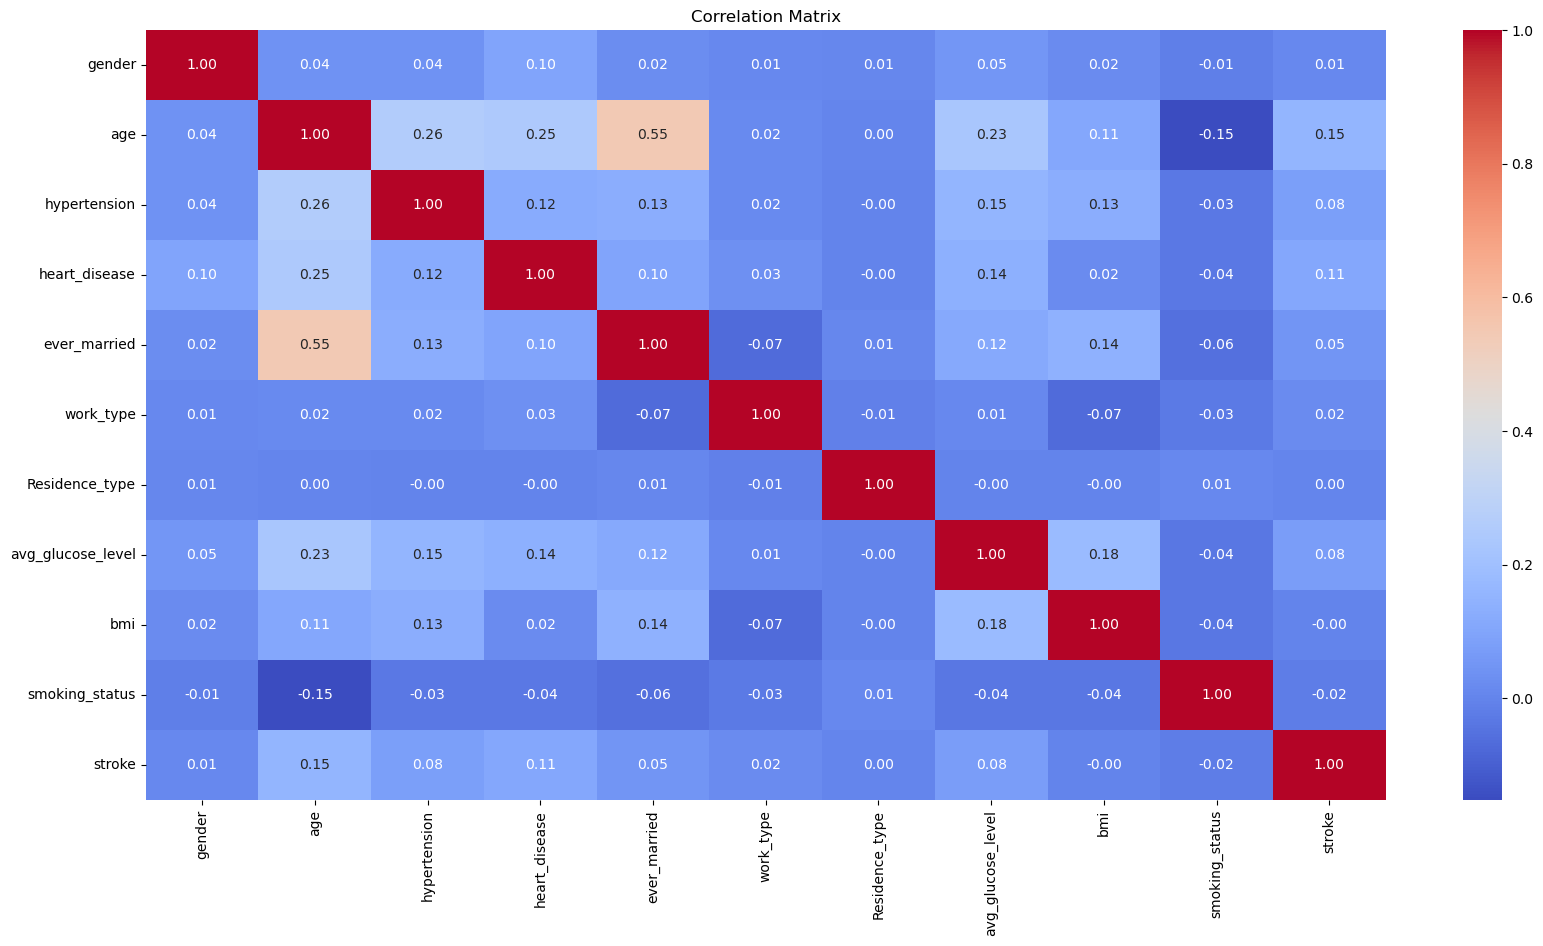

In [12]:
correlation_matrix = pd.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

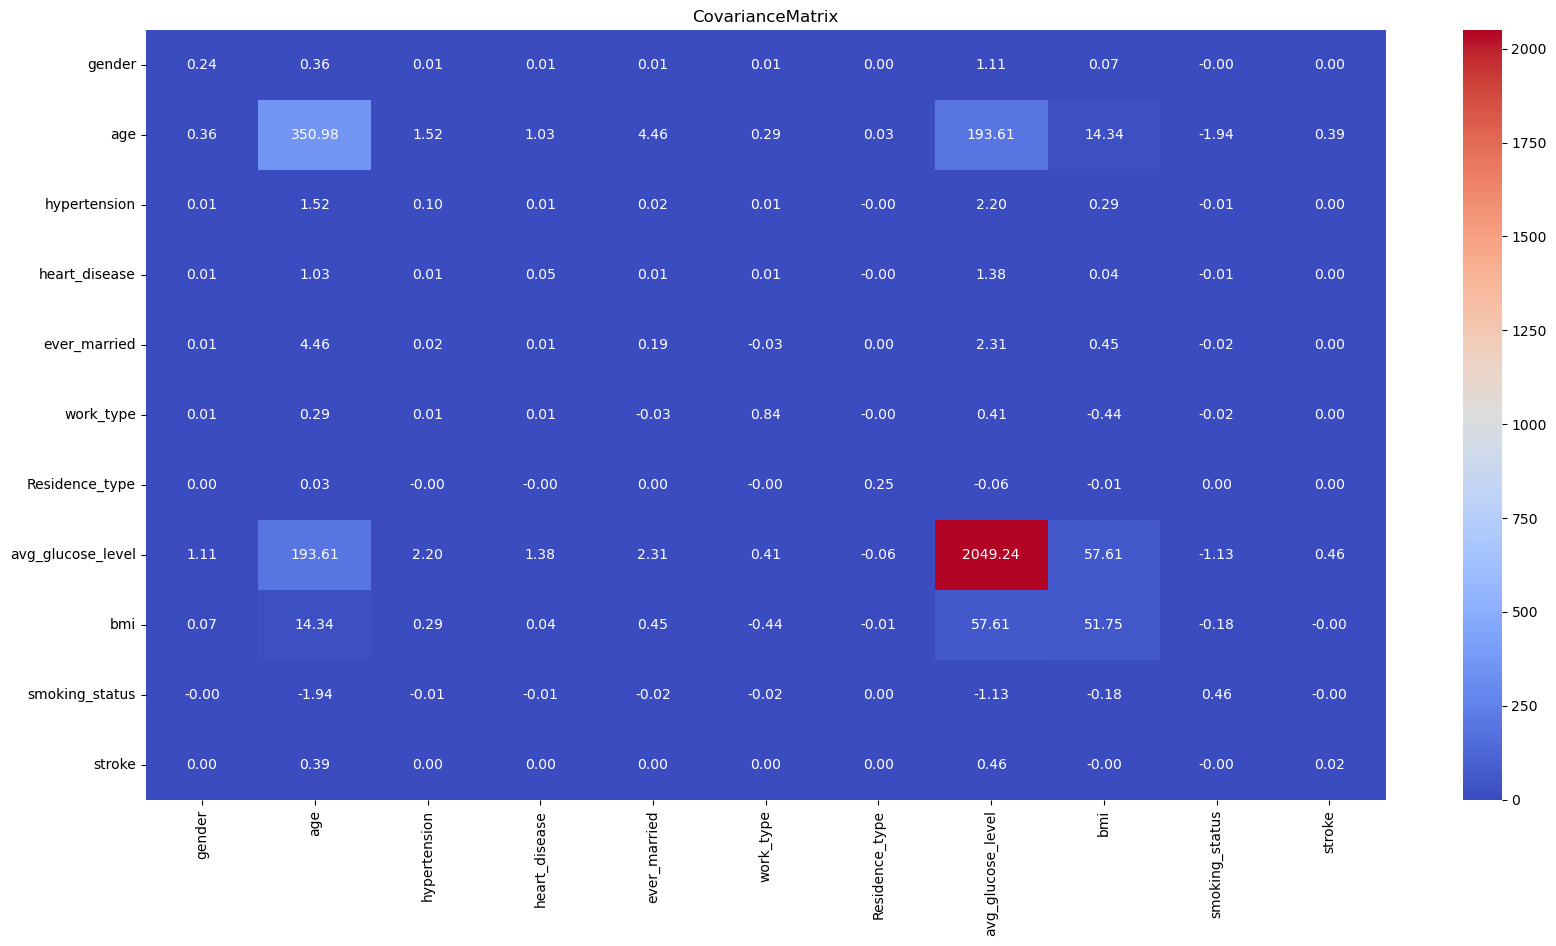

In [13]:
Covariance_matrix = pd.cov()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(Covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('CovarianceMatrix')
plt.show()

* Since the covariance and correlation factor of bmi ans Somking_status is very less,so ve cannot use any preditive models for estmating the missing values.
* Since the nof rows which contains the na values is significant so we can't simply drop the columns with the null entries.
* So we use normal imputation for handling the null values.
* we will use median for the bmi missed values and  unknown as the missed values for smoking_status.

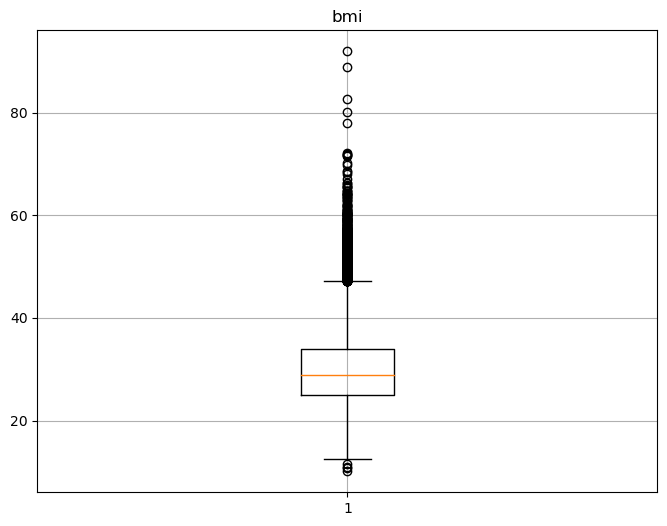

In [14]:
# Selecting only one column for plotting
column_name = 'bmi'  # Replace 'Column1' with your desired column name

plt.figure(figsize=(8, 6))  # Adjust figure size if necessary

# Creating boxplot for the selected column
plt.boxplot(pd[column_name])
plt.title(column_name)
plt.grid(True)

plt.show()

##### Due to high no.of outliers in the boxplot of 'bmi', instead of mean, median would be a better choice to replace the null values.

In [15]:
#replace the na of bmi with median
median_value = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_value)

In [16]:
#the values of the na entries of the smoking_status is filled by 'unknown'
df['smoking_status'] = df['smoking_status'].fillna('unknown')

In [17]:
#check if na values of bmi and smoking_status are now 0
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
#The values of the discrete features are replaced by some encoding like 0,1,2 since for the sake of simplicity
def label_encoder(column):
    labels = column.unique()
    label_mapping = {label: i for i, label in enumerate(labels)}
    encoded_column = column.map(label_mapping)
    return encoded_column, label_mapping

In [19]:
for feature in categorical_features:
    encoded_column, label_mapping = label_encoder(df[feature])  # Use the variable directly
    df[feature] = encoded_column  # Assign the encoded column back to the DataFrame

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  int64  
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  int64  
 5   work_type          43400 non-null  int64  
 6   Residence_type     43400 non-null  int64  
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  int64  
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.6 MB


In [21]:
#dividing the data set into the labels and observations
X=df.drop(['stroke'],axis=1)
Y=df['stroke']

In [22]:
#dividing the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,shuffle=True,random_state=42)

In [23]:
Y_train.value_counts()

0    31975
1      575
Name: stroke, dtype: int64

In [24]:
Y_test.value_counts()

0    10642
1      208
Name: stroke, dtype: int64

#### Since the dataset is more biased to the case stroke does not occur so we have sample the data to the model accuracy

# Over-Sampling of Imbalanced Data

#### The dataset used for the training is biased so we use some techniques such as
* Random oversampling
* SMOTE

**undersampling is not used because it may lead to loss of the data.**

In [25]:
#Ramdom oversampling technique
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_randTrain, Y_randTrain = ros.fit_resample(X_train, Y_train)


In [26]:
Y_randTrain.value_counts()

0    31975
1    31975
Name: stroke, dtype: int64

In [27]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=43)
X_smoteTrain, Y_smoteTrain = smote.fit_resample(X_train, Y_train)

In [28]:
Y_smoteTrain.value_counts()

0    31975
1    31975
Name: stroke, dtype: int64

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter

# Decision Tree Implementation
#### We will be using decision tree  and evaluate performance

In [30]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

In [31]:
class CustomDecisionTree():
    """
    Decision Tree Classifier
    Training: Use "train" function with train set features and labels
    Predicting: Use "predict" function with test set features
    """

    def __init__(self, max_depth=4, min_samples_leaf=1, 
                 min_impurity_decrease=0.0, max_features=None) -> None:
        """
        Setting the class with hyperparameters
        max_depth: (int) -> max depth of the tree
        min_samples_leaf: (int) -> min # of samples required to be in a leaf to make the splitting possible
        min_impurity_decrease: (float) -> min impurity decrease required to make the splitting possible
        max_features: (int, float, {'auto', 'sqrt', 'log2'}) -> Number of features to consider when looking for the best split
        """
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_impurity_decrease = min_impurity_decrease
        self.max_features = max_features

    def train(self, X_train: np.array, Y_train: np.array) -> None:
        """
        Trains the model with given X and Y datasets
        """
        self.tree = DecisionTreeClassifier(max_depth=self.max_depth,
                                           min_samples_leaf=self.min_samples_leaf,
                                           min_impurity_decrease=self.min_impurity_decrease,
                                           max_features=self.max_features)
        self.tree.fit(X_train, Y_train)

    def predict(self, X_set: np.array) -> np.array:
        """Returns the predicted labels for a given data set"""
        return self.tree.predict(X_set)


    def evaluate(self, X_test, Y_test):
        """Evaluates the model using accuracy, precision, recall, and F1-score"""
        Y_pred = self.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred, average='macro')
        recall = recall_score(Y_test, Y_pred, average='macro')
        f1 = f1_score(Y_test, Y_pred, average='macro')
        print("Test size:", len(Y_test))
        print("True predictions:", sum(Y_pred == Y_test))
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)

##### We will let max depth = 4 and minimum number of leaves in a node = 1

In [32]:
# Initialize the decision tree classifiers
tree_regularDataset = CustomDecisionTree(max_depth=4, min_samples_leaf=1)
tree_smoteDataset = CustomDecisionTree(max_depth=4, min_samples_leaf=1)
tree_randDataset = CustomDecisionTree(max_depth=4, min_samples_leaf=1)


In [33]:
# Train the models
tree_regularDataset.train(X_train, Y_train)
tree_smoteDataset.train(X_smoteTrain, Y_smoteTrain)
tree_randDataset.train(X_randTrain, Y_randTrain)


#### We will now evaluate performance
##### First checking on the regular (biased) dataset

In [34]:
# Evaluate the models
print("Evaluation for Regular Dataset:")
tree_regularDataset.evaluate(X_test, Y_test)

Evaluation for Regular Dataset:
Test size: 10850
True predictions: 10642
Accuracy: 0.9808294930875576
Precision: 0.4904147465437788
Recall: 0.5
F1-score: 0.4951609901358645


C:\Users\Nagathejas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### This was expected since our original training dataset (as well as the testing dataset) are biased towards class 0

#### Now, evaluating it for decision tree trained on SMOTE processed dataset

In [35]:
print("Evaluation for SMOTE Dataset:")
tree_smoteDataset.evaluate(X_test, Y_test)

Evaluation for SMOTE Dataset:
Test size: 10850
True predictions: 8635
Accuracy: 0.7958525345622119
Precision: 0.5281276290775165
Recall: 0.7498057406791667
F1-score: 0.5005336072387613


#### For, decision trained on dataset processed via random oversampling

In [36]:
print("Evaluation for Random Dataset:")
tree_randDataset.evaluate(X_test, Y_test)

Evaluation for Random Dataset:
Test size: 10850
True predictions: 8206
Accuracy: 0.7563133640552996
Precision: 0.524952879500219
Recall: 0.7508615174996025
F1-score: 0.4819495141585971


# Logistic Regression
#### We will implement logistic regression from scratch and evaluate performance

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

class LogisticRegression_imp:
    def __init__(self, learning_rate=0.01, num_iterations=1000, threshold=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.threshold = threshold
        self.weights = None
        self.bias = None
        self.mean = None
        self.std = None
        self.losses = []  # List to store loss values during training

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _standardize(self, X, fit=False):
        if fit:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
        X_standardized = (X - self.mean) / self.std
        return X_standardized

    def _initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def fit(self, X, y):
        X = self._standardize(X, fit=True)
        num_samples, num_features = X.shape
        self._initialize_parameters(num_features)
        W1 = y.shape[0] / (2 * y.sum())
        W0 = y.shape[0] / (2 * (y.shape[0] - y.sum()))

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_model)

            # Calculate loss
            loss = (-1 / num_samples) * np.sum(
                W1 * y * np.log(predictions) + W0 * (1 - y) * np.log(1 - predictions)
            )

            # Append loss to list for plotting
            self.losses.append(loss)

            # Gradient descent
            dw = (1 / num_samples) * np.dot(X.T, -(W1 * y * (1 - predictions)) + W0 * (1 - y) * predictions)
            db = (1 / num_samples) * np.sum(-(W1 * y * (1 - predictions)) + W0 * (1 - y) * predictions)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Plot loss curve
        plt.plot(range(1, self.num_iterations + 1), self.losses)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.show()

        # Print final loss value
        print('Final Loss:', self.losses[-1])

    def predict(self, X):
        X = self._standardize(X)
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(linear_model)
        return np.where(predictions >= self.threshold, 1, 0)

    def evaluate(self, X, y):
        X = self._standardize(X)
        y_pred = self.predict(X)
        # Calculate accuracy
        accuracy = accuracy_score(y, y_pred)
        print("Accuracy:", accuracy)

        # Calculate precision
        precision = precision_score(y, y_pred)
        print("Precision:", precision)

        # Calculate recall
        recall = recall_score(y, y_pred)
        print("Recall:", recall)

        # Calculate F1 score
        f1 = f1_score(y, y_pred)
        print("F1 Score:", f1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, y_pred)

        # Plot confusion matrix using seaborn
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

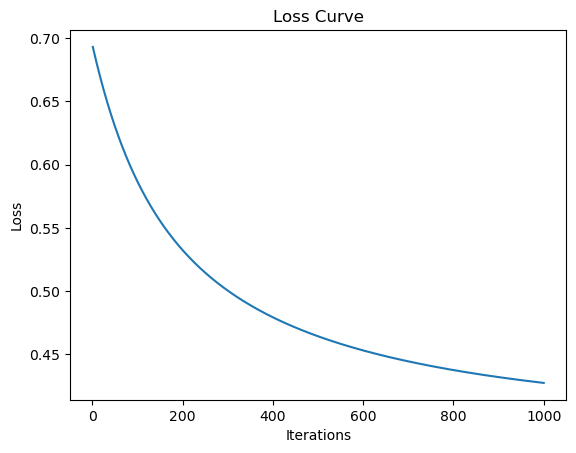

Final Loss: 0.4274493193967268
Accuracy: 0.9741935483870968
Precision: 0.05
Recall: 0.019230769230769232
F1 Score: 0.027777777777777776


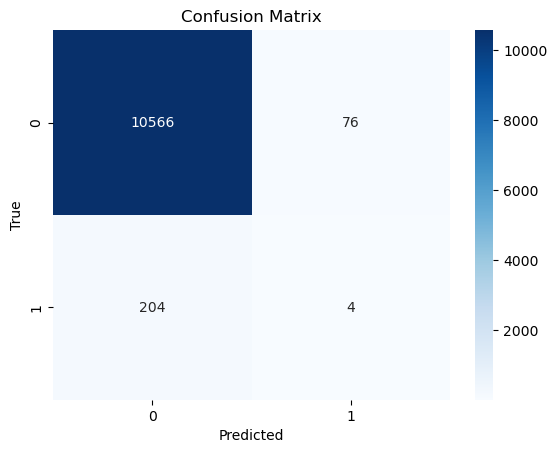

In [38]:
model1 = LogisticRegression_imp(threshold = 0.4) 
model1.fit(X_smoteTrain,Y_smoteTrain)
model1.evaluate(X_test,Y_test)

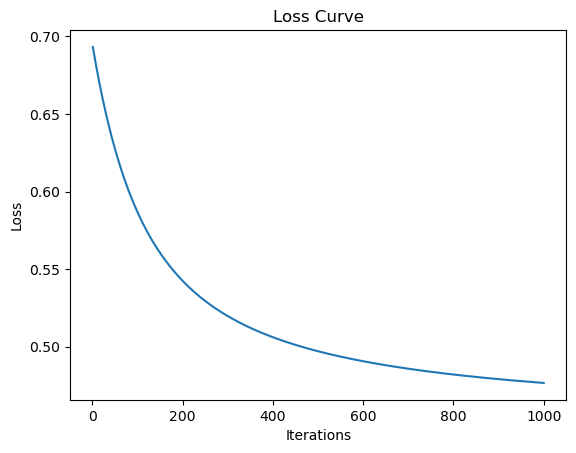

Final Loss: 0.476681939219706
Accuracy: 0.9740092165898617
Precision: 0.13725490196078433
Recall: 0.0673076923076923
F1 Score: 0.0903225806451613


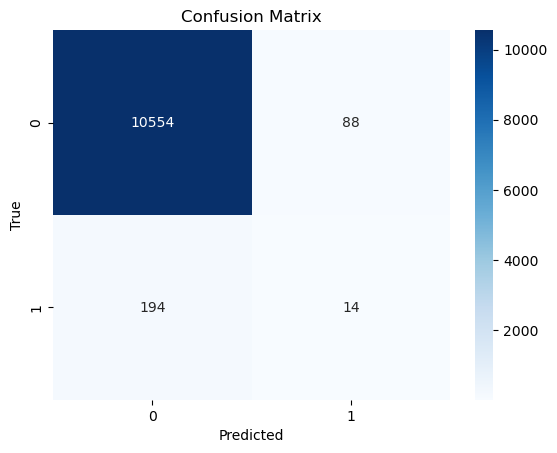

In [39]:
model2 = LogisticRegression_imp() 
model2.fit(X_randTrain, Y_randTrain)
model2.evaluate(X_test, Y_test)

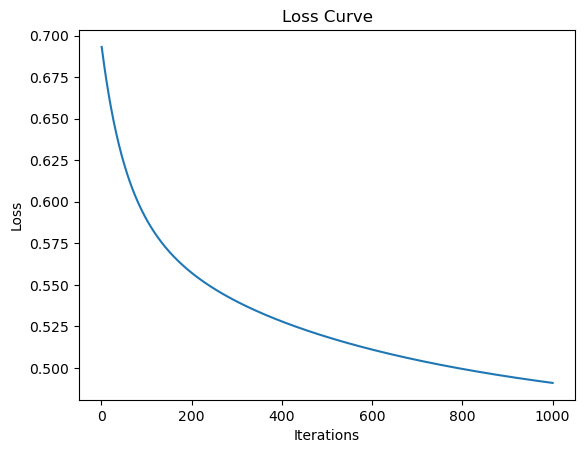

Final Loss: 0.49099024958976095
Accuracy: 0.7278341013824885
Precision: 0.041736227045075125
Recall: 0.6009615384615384
F1 Score: 0.07805182641273806


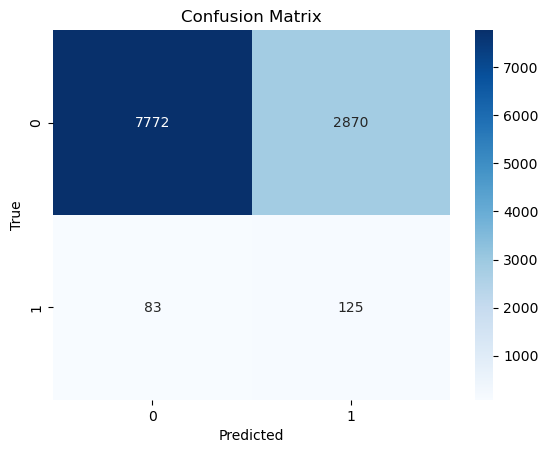

In [40]:
model2 = LogisticRegression_imp(threshold = 0.0589, num_iterations = 1000)
model2.fit(X_train, Y_train)
model2.evaluate(X_test, Y_test)